<a href="https://colab.research.google.com/github/juanlucasumali/decision-tree-from-scratch/blob/main/random_forest_using_skl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data collection and processing

In [37]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
np.random.seed(0)

# Load the iris data into a panda dataframe
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

# Add a new species column in the pandas dataframe
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

# Convert stringed target values into ints
target_ints = {"species":     {"setosa": 0, "versicolor": 1, "virginica": 2}}
df = df.replace(target_ints)

# Splitting featues and target
X = df.drop(columns='species', axis=1)
Y = df['species']

# Splitting the data into training and test data
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

##Creating, training, and evaluating the ML model

In [34]:
#Creating and training the ML model
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, Y_train)

# Testing the accuracy of the model when applied to the TRAINING data
Y_train_prediction = clf.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_prediction, Y_train)

# Testing the accuracy of the model when applied to the TEST data
Y_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(Y_test_prediction, Y_test)

print(f"Training data accuracy: {training_data_accuracy}")
print(f"Test data accuracy: {test_data_accuracy}")

# Different ways to visualize the model evaluation
print(f"\nConfusion Matrix: \n{confusion_matrix(Y_test, Y_test_prediction)}")
print(f"\nClassification Report: \n{classification_report(Y_test, Y_test_prediction)}")

Training data accuracy: 1.0
Test data accuracy: 0.9583333333333334

Confusion Matrix: 
[[40  0  0]
 [ 0 38  2]
 [ 0  3 37]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.95      0.94        40
           2       0.95      0.93      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



<function matplotlib.pyplot.figure>

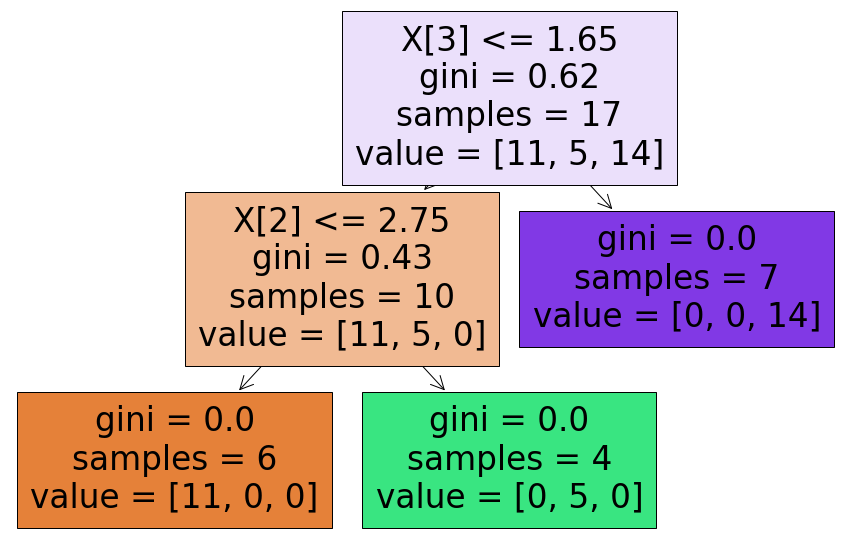

In [56]:
# Visualizing the model
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

# Give a figure size
plt.figure(figsize=(15, 10))

# Can identify then different decision trees within the random forest
tree.plot_tree(clf.estimators_[0], filled=True)

plt.figure